In [2]:
from datetime import datetime
import pickle
from correction.data.train_test_split import find_files
import matplotlib.pyplot as plt
import numpy as np
import pendulum as pdl

In [3]:
ts0 = pdl.parse('2020-01-01').timestamp()
ts1 = pdl.parse('2021-01-02').timestamp()

In [4]:
pdl.from_timestamp(ts1)

DateTime(2021, 1, 2, 0, 0, 0, tzinfo=Timezone('UTC'))

In [5]:
measurements_file = './stations/station_Pyalitsa_2019-01-01_2023-08-10.pkl'
station_files = find_files('./stations', '*')
names = []
coords = []
stations = []
for file in station_files:
    with open(file, 'rb') as f:
        measurements = pickle.load(f)
        names.append(measurements['Name'])
        coords.append(measurements['Coords'])
        stations.append(measurements['Station'])
stations = np.swapaxes(np.array(stations), 0, 1)
coords = np.array(coords)
coords[:, [0, 1]] = coords[:, [1, 0]]

In [6]:
slice0 = np.where(stations[:, 0, 0] == ts0)[0][0]
slice1 = np.where(stations[:, 0, 0] == ts1)[0][0]
stations[slice0:slice1, 0, 0]

array([1.5778368e+09, 1.5778404e+09, 1.5778440e+09, ..., 1.6095348e+09,
       1.6095384e+09, 1.6095420e+09])

In [7]:
dates = stations[:, 0, 0]
slices = np.where((dates == ts0) | (dates == ts1))[0]
s = stations[slices[0]:slices[1]+24]

In [9]:
s[:, :, [1, 3]].shape

(8832, 46, 2)

In [83]:
pdl.from_timestamp(s[-1, 0, 0])

DateTime(2021, 1, 2, 23, 0, 0, tzinfo=Timezone('UTC'))

In [4]:
measurements['Station']

,timestamp,TC,PSFC,WSPD10
0,1.662584e+09,278.550000,758.100000,3.000000
1,1.662588e+09,278.283333,758.166667,2.333333
2,1.662592e+09,278.016667,758.233333,1.666667
3,1.662595e+09,277.750000,758.300000,1.000000
4,1.662599e+09,277.750000,758.266667,1.333333
...,...,...,...,...
8063,1.691611e+09,291.016667,758.200000,4.000000
8064,1.691615e+09,290.350000,758.300000,4.000000
8065,1.691618e+09,289.950000,758.466667,4.333333
8066,1.691622e+09,289.550000,758.633333,4.666667


In [10]:
era_xx = np.load('./metadata/era_xx.npy')
era_yy = np.load('./metadata/era_yy.npy')
wrf_xx = np.load('./metadata/wrf_xx.npy')
wrf_yy = np.load('./metadata/wrf_yy.npy')

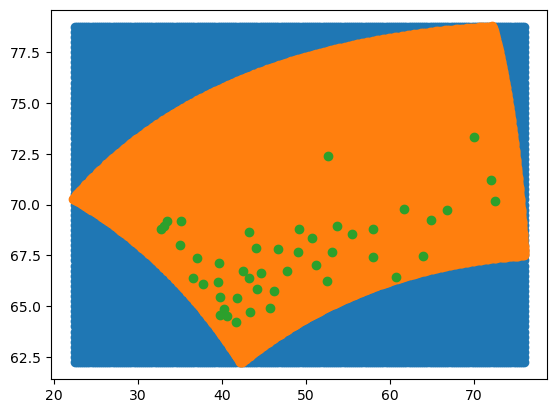

In [11]:
plt.scatter(era_xx, era_yy)
plt.scatter(wrf_xx, wrf_yy)
plt.scatter(coords[:,0], coords[:, 1])

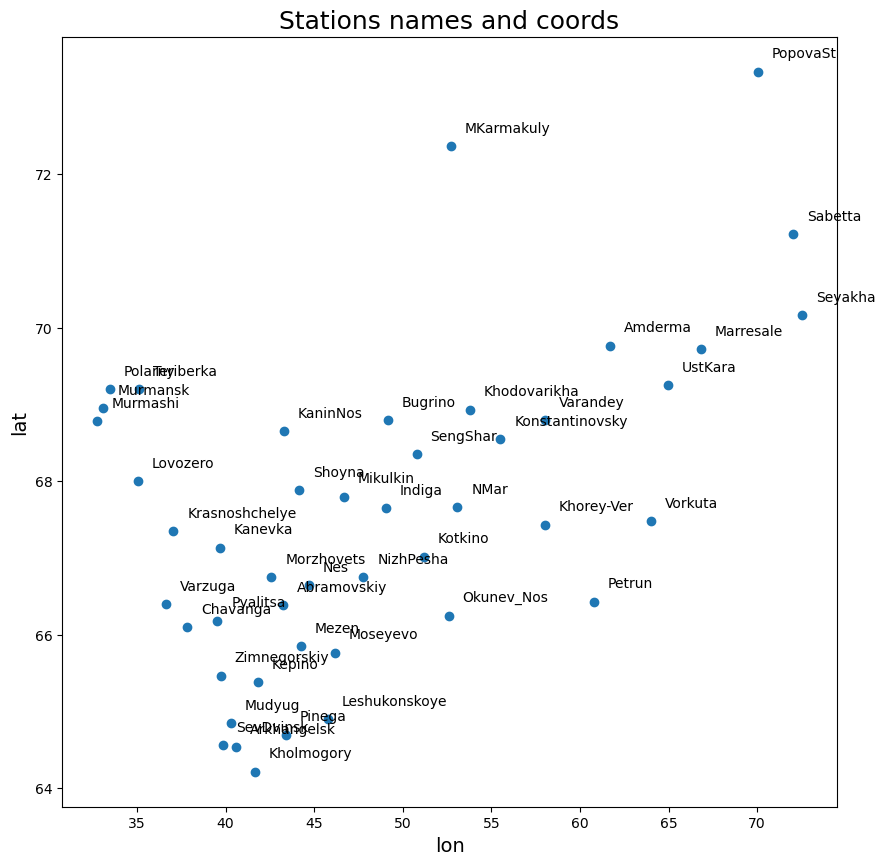

In [12]:
x = coords[:,0]
y = coords[:,1]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('lon', fontsize=14)
ax.set_ylabel('lat', fontsize=14)
ax.set_title('Stations names and coords', fontsize=18)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
#     plt.scatter(x, y, marker='x', color='red')

In [7]:
measurements['Station'].sort_values('timestamp')['timestamp']
datetime.fromtimestamp(measurements['Station']['timestamp'][0]),datetime.fromtimestamp(measurements['Station']['timestamp'][8063])

(datetime.datetime(2022, 9, 8, 0, 0), datetime.datetime(2023, 8, 9, 23, 0))

In [8]:
wrf_folder = 'C:\\Users\\Viktor\\Desktop\\wrf_test'
era_folder = 'C:\\Users\\Viktor\\Desktop\\era_test'

test_file = find_files(wrf_folder, '*')[0]
test_file2 = find_files(era_folder, '*')[0]

# np.load()
import netCDF4
import wrf
with netCDF4.Dataset(test_file, 'r') as ncf:
    var = wrf.getvar(ncf, 'T2', wrf.ALL_TIMES, meta=False)
wrf_tensor = var.data[12]

with netCDF4.Dataset(test_file2, 'r') as ncf2:
    var = wrf.getvar(ncf2, 't2m', wrf.ALL_TIMES, meta=False)
era_tensor = var.data[12]

In [9]:
from scipy.interpolate import LinearNDInterpolator
import numpy as np
import matplotlib.pyplot as plt
grid = list(zip(wrf_xx.flatten(), wrf_yy.flatten()))
interp = LinearNDInterpolator(grid, wrf_tensor.flatten())
Z = interp(coords[:,0], coords[:,1])
Z

array([262.33319216, 257.97212117, 265.75457951, 264.81351046,
       272.10964431, 259.12009232, 263.92246896, 269.37877866,
       264.39800748, 262.42581921, 259.83234054, 258.1533907 ,
       258.93641135, 260.55217203, 264.51483751, 260.54365075,
       265.93836929, 266.52943272, 262.29044946, 258.547502  ,
       260.58172579, 258.94628721, 258.66981023, 266.4597481 ,
       258.99608803, 271.39069028, 257.60554202, 259.95488187,
       267.53774943, 259.30962201, 267.20638249, 270.21129251,
       258.18576594, 258.58962959, 265.3885496 , 269.69303164])

In [10]:
stations_sample = stations[:, :4, [1,3]]
stations_sample.shape

(36, 4, 2)

In [11]:
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.collections import PatchCollection

__all__ = ['arcs']

def arcs(x, y, w, h=None, rot=0.0, theta1=0.0, theta2=360.0,
         c='b', vmin=None, vmax=None, **kwargs):
    """
    Make a scatter plot of Arcs. 
    Parameters
    ----------
    x, y : scalar or array_like, shape (n, )
        Center of ellipses.
    w, h : scalar or array_like, shape (n, )
        Total length (diameter) of horizontal/vertical axis.
        `h` is set to be equal to `w` by default, ie. circle.
    rot : scalar or array_like, shape (n, )
        Rotation in degrees (anti-clockwise).
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs.
        Note that `c` should not be a single numeric RGB or RGBA sequence
        because that is indistinguishable from an array of values
        to be colormapped. (If you insist, use `color` instead.)
        `c` can be a 2-D array in which the rows are RGB or RGBA, however.
    vmin, vmax : scalar, optional, default: None
        `vmin` and `vmax` are used in conjunction with `norm` to normalize
        luminance data.  If either are `None`, the min and max of the
        color array is used.
    kwargs : `~matplotlib.collections.Collection` properties
        Eg. alpha, edgecolor(ec), facecolor(fc), linewidth(lw), linestyle(ls),
        norm, cmap, transform, etc.
    Returns
    -------
    paths : `~matplotlib.collections.PathCollection`
    Examples
    --------
    a = np.arange(11)
    arcs(a, a, w=4, h=a, rot=a*30, theta1=0.0, theta2=180.0, 
         c=a, alpha=0.5, ec='none')
    plt.colorbar()
    License
    --------
    This code is under [The BSD 3-Clause License]
    (http://opensource.org/licenses/BSD-3-Clause)
    """
    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None

    if 'fc' in kwargs:
        kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs:
        kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs:
        kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs:
        kwargs.setdefault('linewidth', kwargs.pop('lw'))
    # You can set `facecolor` with an array for each patch,
    # while you can only set `facecolors` with a value for all.

    if h is None:
        h = w

    zipped = np.broadcast(x, y, w, h, rot, theta1, theta2)
    patches = [Arc((x_, y_), w_, h_, rot_, t1_, t2_)
               for x_, y_, w_, h_, rot_, t1_, t2_ in zipped]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        c = np.broadcast_to(c, zipped.shape).ravel()
        collection.set_array(c)
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    plt.draw_if_interactive()
    if c is not None:
        plt.sci(collection)
    return collection


In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Wedge
import matplotlib
import torch

In [13]:
a = torch.rand(32)*2 - 1
b = torch.rand(32)*2 - 1

C:\Users\Viktor\AppData\Local\Temp\ipykernel_9048\141319990.py:70: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = [Arc((x_, y_), w_, h_, rot_, t1_, t2_)


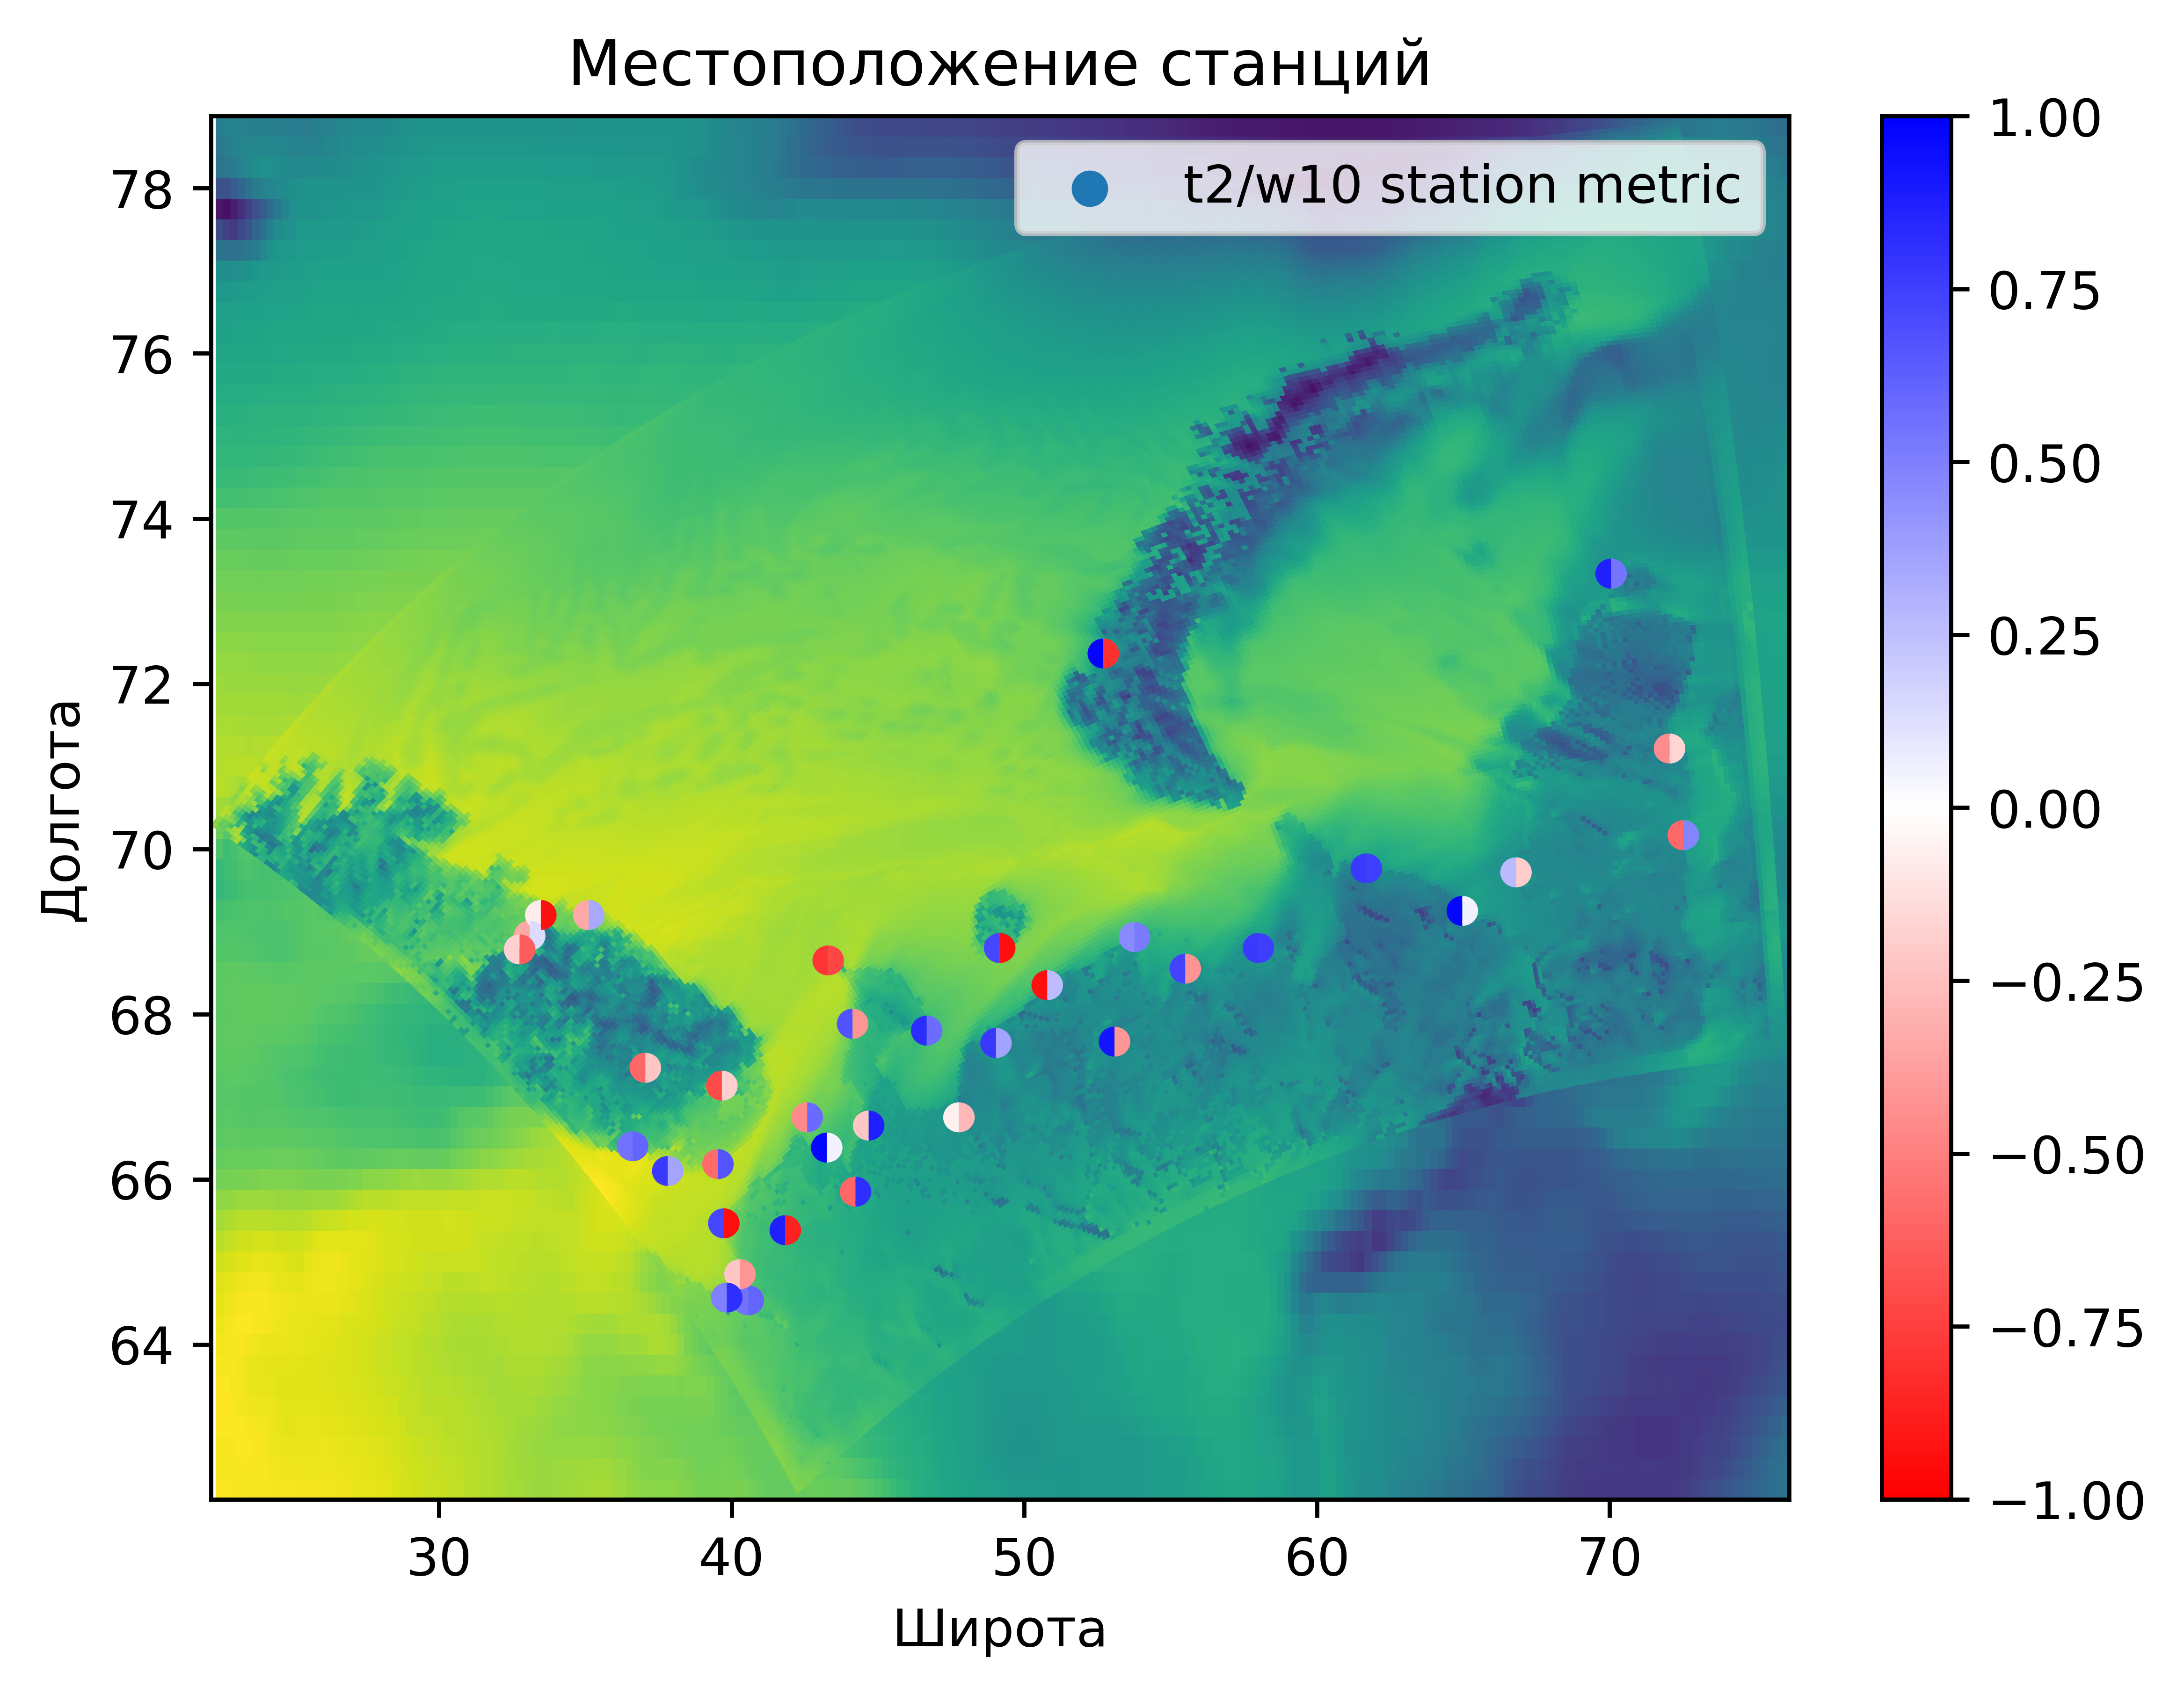

In [14]:


fig, ax = plt.subplots(dpi=800)
cmap = plt.cm.get_cmap('bwr_r')
norm = colors.Normalize(vmin=-1, vmax=1)
plt.scatter(coords[:,0], coords[:,1], label='t2/w10 station metric')
plt.pcolormesh(era_xx, era_yy, era_tensor, shading='auto')

plt.pcolormesh(wrf_xx, wrf_yy, wrf_tensor, shading='auto')


theta1, theta2 = 90, 90 + 180
radius = 0.3
center = (0, 0)
size = fig.get_size_inches()*fig.dpi 

arcs(coords[:,0], coords[:,1], 3*radius, radius, theta1=90, theta2=270,color=cmap(norm(a)))
arcs(coords[:,0], coords[:,1], 3*radius, radius, theta1=270, theta2=90, color=cmap(norm(b)))

plt.title('Местоположение станций')
plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.legend()

fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,orientation='vertical', fraction=0.1)


In [15]:
import torch
def get_distances_matrix(a, b):
    r = torch.mm(a.t(), b)
    r1 = torch.mm(a.t(), a)
    diag1 = r1.diag().unsqueeze(1)
    diag1 = diag1.expand_as(r)
    r2 = torch.mm(b.t(), b)
    diag2 = r2.diag().unsqueeze(0)
    diag2 = diag2.expand_as(r)
    D = (diag1 + diag2 - 2 * r).sqrt()
    return D

In [1]:
import numpy as np
from correction.models.changeToERA5 import MeanToERA5 

In [2]:
mapping = np.load('wrferaMapping.npy')
wxx = np.flip(np.load('metadata/wrf_xx.npy'), 0)
wyy = np.flip(np.load('metadata/wrf_yy.npy'), 0)
exx = np.load('metadata/era_xx.npy')
eyy = np.load('metadata/era_yy.npy')

In [3]:
np.save('metadata/wrf_xx.npy', wxx)
np.save('metadata/wrf_yy.npy', wyy)

In [19]:
wxx

array([[22.318695, 22.411926, 22.505524, ..., 71.68228 , 71.95456 ,
        72.22717 ],
       [22.449432, 22.542786, 22.636536, ..., 71.71973 , 71.990845,
        72.26224 ],
       [22.579742, 22.673248, 22.76715 , ..., 71.75687 , 72.026764,
        72.297   ],
       ...,
       [42.139435, 42.233063, 42.326904, ..., 75.711426, 75.85306 ,
        75.99475 ],
       [42.20688 , 42.300446, 42.394196, ..., 75.721466, 75.86276 ,
        76.00412 ],
       [42.27414 , 42.367615, 42.461304, ..., 75.731445, 75.872406,
        76.01343 ]], dtype=float32)

In [5]:
wrf = np.stack((wxx.flatten(), wyy.flatten()))
era = np.stack((exx.flatten(), eyy.flatten()))

In [6]:
nearest = torch.topk(get_distances_matrix(torch.tensor(wrf), torch.tensor(era)), 1, 1, largest=False)

In [7]:
nearest.values

tensor([[0.1822],
        [0.1169],
        [0.1250],
        ...,
        [0.0000],
        [0.1169],
        [0.0000]])

In [8]:
nearest.indices

tensor([[7310],
        [7310],
        [7095],
        ...,
        [9888],
        [9888],
        [9889]])

In [9]:
mapping

array([7310, 7310, 7095, ..., 9888, 9888, 9889])

In [10]:
wrf

array([[72.22717 , 71.95456 , 71.68228 , ..., 42.461304, 42.367615,
        42.27414 ],
       [78.75766 , 78.75067 , 78.74345 , ..., 62.29216 , 62.26098 ,
        62.22973 ]], dtype=float32)

In [18]:
era[:, 7310]

array([22.5 , 70.25], dtype=float32)

In [19]:
era[:, 14269]

array([42.25, 62.25], dtype=float32)